In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

pd.set_option('display.max_columns', 500)

In [2]:
df_yearly = pd.read_csv('Yearly data 2.csv')
df_yearly = df_yearly.drop('Unnamed: 0', axis=1)


In [3]:
df_yearly

,Orgunit name,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Total_tested,Infection_rate,Infection_rate_perc,HCD - Combined Oral contraceptive Pills,HCD - Emergency Contraceptive pills,HCD - Female Condoms,HCD - IUCDs,HCD - Implants (1-Rod),HCD - Implants (2-Rod) - 3yrs,HCD - Injectables,HCD - Male Condoms,HCD - Oral self-test Kit,HCD - Progestin only pills,Total_contraceptive_population,Condoms used,Total_Population19,Male populatio 2019,Female population 2019,Households,Av_HH_Size,LandArea,Population Density,Population in 2009,Pop_change,Intersex population 2019,Perc_pop_with_HIV
0,Baringo County,47.0,567.0,0.0,672.0,0.0,0.0,0.0,672.0,1.000000,100.000000,17931.0,439.0,436.0,2270.0,0.0,1953.0,0.0,0.0,496.0,0.0,23525.0,436.0,666763,336322,330428,142518,5,10976,61,555561,111202,13,0.100785
1,Bomet County,109.0,0.0,53236.0,1208.0,0.0,0.0,2870.0,54444.0,0.022188,2.218794,43887.0,30.0,990.0,1542.0,0.0,21346.0,0.0,1365340.0,212.0,0.0,1433347.0,1366330.0,875689,434287,441379,187641,5,2531,346,724186,151503,23,0.137949
2,Bungoma County,195.0,3170.0,61843.0,0.0,0.0,32689.0,3897.0,61843.0,0.000000,0.000000,116238.0,368.0,28807.0,17031.0,3454.0,27702.0,0.0,4275011.0,0.0,0.0,4468611.0,4303818.0,1670570,812146,858389,358796,5,3024,552,1630934,39636,35,0.000000
3,Busia County,113.0,0.0,0.0,2232.0,1843.0,19423.0,6685.0,2232.0,1.000000,100.000000,0.0,146.0,5894.0,474.0,4787.0,0.0,13745.0,112708.0,612.0,1743.0,140109.0,118602.0,893681,426252,467401,198152,5,1696,527,488075,405606,28,0.249754
4,Elgeyo Marakwet County,24.0,0.0,14892.0,0.0,0.0,0.0,575.0,14892.0,0.000000,0.000000,26006.0,1105.0,5222.0,2885.0,1698.0,2824.0,0.0,0.0,8.0,0.0,39748.0,5222.0,454480,227317,227151,99861,5,3032,150,369998,84482,12,0.000000
5,Embu County,52.0,0.0,0.0,885.0,1636.0,0.0,891.0,885.0,1.000000,100.000000,37983.0,0.0,44761.0,2576.0,1356.0,7010.0,0.0,790111.0,480.0,0.0,884277.0,834872.0,608599,304208,304367,182743,3,2821,216,516212,92387,24,0.145416
6,Garissa County,12.0,0.0,16800.0,0.0,0.0,11939.0,0.0,16800.0,0.000000,0.000000,17416.0,75.0,32.0,2417.0,0.0,1434.0,6653.0,171795.0,0.0,1297.0,201119.0,171827.0,841353,458975,382344,141394,6,44736,19,623060,218293,34,0.000000
7,Homa Bay County,840.0,0.0,205316.0,0.0,9340.0,0.0,0.0,205316.0,0.000000,0.000000,79528.0,1880.0,13358.0,14751.0,31292.0,20722.0,0.0,4510442.0,1358.0,0.0,4673331.0,4523800.0,1131950,539560,592367,262036,4,3153,359,963794,168156,23,0.000000
8,Isiolo County,6.0,0.0,0.0,200.0,357.0,0.0,844.0,200.0,1.000000,100.000000,6878.0,23.0,532.0,642.0,0.0,0.0,0.0,40006.0,0.0,536.0,48617.0,40538.0,268002,139510,128483,58072,5,25350,11,143294,124708,9,0.074626
9,Kajiado County,131.0,1925.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,61650.0,0.0,1176.0,4995.0,8112.0,18534.0,0.0,614010.0,564.0,0.0,709041.0,615186.0,1117840,557098,560704,316179,4,21871,51,687312,430528,38,0.000000


In [4]:
df_yearly.columns

Index(['Orgunit name', 'MOH 731   Discordant HV01-28',
       'MOH 731   Linked_Total HV01-35', 'MOH 731   Negative_Total HV01-27',
       'MOH 731   Positive_Total   (Sum  HV01-18 to  HV01-25) HV01-26',
       'MOH 731  Tested_Couples HV01-15', 'MOH 731  Tested_New HV01-13',
       'MOH 731  Total       HV01-50', 'Total_tested', 'Infection_rate',
       'Infection_rate_perc', 'HCD - Combined Oral contraceptive Pills',
       'HCD - Emergency Contraceptive pills', 'HCD - Female Condoms',
       'HCD - IUCDs', 'HCD - Implants (1-Rod)',
       'HCD - Implants (2-Rod) - 3yrs', 'HCD - Injectables',
       'HCD - Male Condoms', 'HCD - Oral self-test Kit',
       'HCD - Progestin only pills', 'Total_contraceptive_population',
       'Condoms used', 'Total_Population19', 'Male populatio 2019',
       'Female population 2019', 'Households', 'Av_HH_Size', 'LandArea',
       'Population Density', 'Population in 2009', 'Pop_change',
       'Intersex population 2019', 'Perc_pop_with_HIV'],
      d

In [5]:
df_mdl = df_yearly[['Orgunit name','MOH 731   Positive_Total   (Sum  HV01-18 to  HV01-25) HV01-26','Total_tested' ,'HCD - Male Condoms' ,'HCD - Female Condoms','Total_Population19','Perc_pop_with_HIV','Infection_rate']]
df_mdl

,Orgunit name,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,Total_tested,HCD - Male Condoms,HCD - Female Condoms,Total_Population19,Perc_pop_with_HIV,Infection_rate
0,Baringo County,672.0,672.0,0.0,436.0,666763,0.100785,1.000000
1,Bomet County,1208.0,54444.0,1365340.0,990.0,875689,0.137949,0.022188
2,Bungoma County,0.0,61843.0,4275011.0,28807.0,1670570,0.000000,0.000000
3,Busia County,2232.0,2232.0,112708.0,5894.0,893681,0.249754,1.000000
4,Elgeyo Marakwet County,0.0,14892.0,0.0,5222.0,454480,0.000000,0.000000
5,Embu County,885.0,885.0,790111.0,44761.0,608599,0.145416,1.000000
6,Garissa County,0.0,16800.0,171795.0,32.0,841353,0.000000,0.000000
7,Homa Bay County,0.0,205316.0,4510442.0,13358.0,1131950,0.000000,0.000000
8,Isiolo County,200.0,200.0,40006.0,532.0,268002,0.074626,1.000000
9,Kajiado County,0.0,0.0,614010.0,1176.0,1117840,0.000000,0.000000


In [6]:
df_mdl = df_mdl[(df_mdl['Infection_rate'] > 0) & (df_mdl['Infection_rate'] < 1)]
df_mdl

,Orgunit name,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,Total_tested,HCD - Male Condoms,HCD - Female Condoms,Total_Population19,Perc_pop_with_HIV,Infection_rate
1,Bomet County,1208.0,54444.0,1365340.0,990.0,875689,0.137949,0.022188
12,Kiambu County,4515.0,205708.0,2083079.0,7920.0,2417735,0.186745,0.021949
14,Kirinyaga County,1021.0,78075.0,382092.0,0.0,610411,0.167264,0.013077
21,Machakos County,2760.0,109454.0,1552905.0,9213.0,1421932,0.194102,0.025216
25,Migori County,6755.0,247678.0,5786650.0,0.0,1116436,0.605050,0.027273
26,Mombasa County,4907.0,185437.0,1411381.0,10574.0,1208333,0.406097,0.026462
34,Siaya County,7064.0,169758.0,0.0,0.0,993183,0.711249,0.041612
39,Turkana County,1848.0,164475.0,979265.0,0.0,926976,0.199358,0.011236
40,Uasin Gishu County,3101.0,88859.0,1831759.0,11160.0,1163186,0.266595,0.034898
41,Vihiga County,1507.0,44247.0,0.0,488.0,590013,0.255418,0.034059


In [36]:
df_dummy = pd.get_dummies(df_mdl)
df_dummy

,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,Total_tested,HCD - Male Condoms,HCD - Female Condoms,Total_Population19,Perc_pop_with_HIV,Infection_rate,Orgunit name_Bomet County,Orgunit name_Kiambu County,Orgunit name_Kirinyaga County,Orgunit name_Machakos County,Orgunit name_Migori County,Orgunit name_Mombasa County,Orgunit name_Siaya County,Orgunit name_Turkana County,Orgunit name_Uasin Gishu County,Orgunit name_Vihiga County
1,1208.0,54444.0,1365340.0,990.0,875689,0.137949,0.022188,1,0,0,0,0,0,0,0,0,0
12,4515.0,205708.0,2083079.0,7920.0,2417735,0.186745,0.021949,0,1,0,0,0,0,0,0,0,0
14,1021.0,78075.0,382092.0,0.0,610411,0.167264,0.013077,0,0,1,0,0,0,0,0,0,0
21,2760.0,109454.0,1552905.0,9213.0,1421932,0.194102,0.025216,0,0,0,1,0,0,0,0,0,0
25,6755.0,247678.0,5786650.0,0.0,1116436,0.605050,0.027273,0,0,0,0,1,0,0,0,0,0
26,4907.0,185437.0,1411381.0,10574.0,1208333,0.406097,0.026462,0,0,0,0,0,1,0,0,0,0
34,7064.0,169758.0,0.0,0.0,993183,0.711249,0.041612,0,0,0,0,0,0,1,0,0,0
39,1848.0,164475.0,979265.0,0.0,926976,0.199358,0.011236,0,0,0,0,0,0,0,1,0,0
40,3101.0,88859.0,1831759.0,11160.0,1163186,0.266595,0.034898,0,0,0,0,0,0,0,0,1,0
41,1507.0,44247.0,0.0,488.0,590013,0.255418,0.034059,0,0,0,0,0,0,0,0,0,1


In [8]:
len(df_dummy.columns)

17

In [9]:
# features 
X = df_dummy.drop('Infection_rate', axis=1)
X.head()

,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,Total_tested,HCD - Male Condoms,HCD - Female Condoms,Total_Population19,Perc_pop_with_HIV,Orgunit name_Bomet County,Orgunit name_Kiambu County,Orgunit name_Kirinyaga County,Orgunit name_Machakos County,Orgunit name_Migori County,Orgunit name_Mombasa County,Orgunit name_Siaya County,Orgunit name_Turkana County,Orgunit name_Uasin Gishu County,Orgunit name_Vihiga County
1,1208.0,54444.0,1365340.0,990.0,875689,0.137949,1,0,0,0,0,0,0,0,0,0
12,4515.0,205708.0,2083079.0,7920.0,2417735,0.186745,0,1,0,0,0,0,0,0,0,0
14,1021.0,78075.0,382092.0,0.0,610411,0.167264,0,0,1,0,0,0,0,0,0,0
21,2760.0,109454.0,1552905.0,9213.0,1421932,0.194102,0,0,0,1,0,0,0,0,0,0
25,6755.0,247678.0,5786650.0,0.0,1116436,0.605050,0,0,0,0,1,0,0,0,0,0


In [10]:
y = df_dummy['Infection_rate']
y

1     0.022188
12    0.021949
14    0.013077
21    0.025216
25    0.027273
26    0.026462
34    0.041612
39    0.011236
40    0.034898
41    0.034059
Name: Infection_rate, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
#help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
predictions = model.predict(X_test)
predictions

array([0.03295618, 0.02318377, 0.02931492])

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#MAE
MAE = mean_absolute_error(y_test, predictions) #does not punish for larger errors
print(f'MAE: {MAE}')

MAE: 0.006391795902551198


In [16]:
#RMSE
RMSE = np.sqrt(mean_squared_error(y_test, predictions)) #punishes for larger errors
print(f'RMSE: {RMSE}')

RMSE: 0.007227445666056179


In [17]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,6.053820e-06
Total_tested,-1.933920e-07
HCD - Male Condoms,2.669026e-10
HCD - Female Condoms,-1.611523e-07
Total_Population19,1.228010e-09
Perc_pop_with_HIV,-1.281735e-05
Orgunit name_Bomet County,0.000000e+00
Orgunit name_Kiambu County,8.991301e-04
Orgunit name_Kirinyaga County,0.000000e+00
Orgunit name_Machakos County,-2.250857e-03


In [18]:
polyconverter = PolynomialFeatures(degree=3, include_bias=False)  

In [19]:
poly_features = polyconverter.fit_transform(X)

In [20]:
poly_features

array([[1.208000e+03, 5.444400e+04, 1.365340e+06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.515000e+03, 2.057080e+05, 2.083079e+06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.021000e+03, 7.807500e+04, 3.820920e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.848000e+03, 1.644750e+05, 9.792650e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.101000e+03, 8.885900e+04, 1.831759e+06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.507000e+03, 4.424700e+04, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00]])

In [21]:
poly_features.shape

(10, 968)

In [22]:
X.shape

(10, 16)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
predictions = model.predict(X_test)

In [27]:
MAE = mean_absolute_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))

In [28]:
print(f'MAE: {MAE}')

MAE: 0.0037275480062401666


In [29]:
print(f'RMSE: {RMSE}')

RMSE: 0.0037989036830058834


In [30]:
train_rmse = []
test_rmse = []

for d in range(1,10):
    polyconvert = PolynomialFeatures(degree=d, include_bias=False)
    
    poly_feat = polyconvert.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=42)
    
    model = LinearRegression()
    
    model.fit(X_train,y_train)
    
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    te_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
    tr_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
    
    test_rmse.append(te_RMSE)
    train_rmse.append(tr_RMSE)
    #print(train_rmse)

In [31]:
test_rmse #optimal degree is one, so the normal Linear Regression

[0.004444825060593795,
 0.15003601608884318,
 0.006663525418091895,
 0.4102896099571292,
 4.239370438253556,
 24.532698943567137,
 119.38083455168963,
 545.9050520955212,
 2422.9712500509063]

In [32]:
train_rmse

[2.77013217751587e-15,
 5.304916157515238e-16,
 7.250349646736122e-17,
 1.3983433056694332e-15,
 2.5191162227565962e-14,
 3.1468383282582023e-13,
 2.1477053318134884e-12,
 1.1444347953884207e-11,
 7.056462869428117e-11]

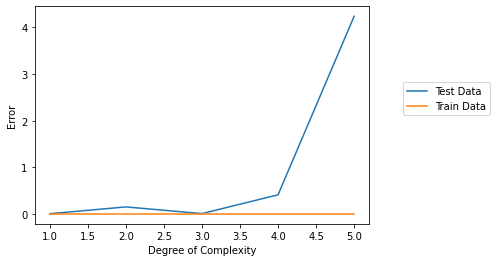

In [33]:
#an increase in complexity reduces the error up until 3, after which it incs
plt.plot(range(1,6), test_rmse[:5], label='Test Data')
plt.plot(range(1,6), train_rmse[:5], label='Train Data')

plt.xlabel('Degree of Complexity')
plt.ylabel('Error')

plt.legend(loc=[1.1,0.5])

plt.show()

## Conclusion 
Although the dataset was small with a limited number of rows, a polynomial regression algorithm with a degree of 3 was found to be the most accurate model. It was able to predict the Infection rate with a RMSE of + or - 0.3 percent. This was slightly better compared to the 0.7 percent achieved by the multiple linear regression model with a degree of 1